# Road Safety Analysis Using Traffic Accident Data

##  Table of Contents

1.  Problem Statement
2.  Objective
3.  Data Loading and Inspection   
4.  Exploratory Data Analysis  
5.  Data Preprocessing  
6.  Feature Engineering 
7.  Model Training & Evaluation
8.  Result
10. Conclusion


## Problem Statement


Road traffic accidents are a significant public safety concern. Analyzing traffic accident data can help identify the key factors contributing to accident severity and help in preventive planning. The goal is to perform Exploratory Data Analysis (EDA) on a dataset of traffic accidents to discover hidden patterns and correlations.



## Objective


1.To clean and preprocess the traffic accident dataset.

2.To perform EDA and identify key variables that influence accident severity.

3.To analyze correlations between weather conditions, geographical features, and accident severity.

4.To prepare the data for future modeling or risk prediction.

## Loading libraries

In [1]:
# Loading all the necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



##  Loading the Dataset

In [2]:
# Reading the dataset
df = pd.read_csv('US_Accidents_March23.csv')

# Printing first 10 records of the dataset
df.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Prints the shape of the dataset as a tuple
df.shape

(7728394, 46)

In [4]:
df.duplicated().sum() # there is no duplicate values

0

## EDA (Exploratory Data Analysis)

In [5]:
# format all floating-point numbers to 2 decimal places when displaying them in tables
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
# Prints the columns name as a list
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
# Basic statistical summary of the dataset
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7728394.00,7728394.00,7728394.00,4325632.00,4325632.00,7728394.00,7564541.00,5729375.00,7554250.00,7587715.00,7551296.00,7157161.00,5524808.00
mean,2.21,36.20,-94.70,36.26,-95.73,0.56,61.66,58.25,64.83,29.54,9.09,7.69,0.01
std,0.49,5.08,17.39,5.27,18.11,1.78,19.01,22.39,22.82,1.01,2.69,5.42,0.11
min,1.00,24.55,-124.62,24.57,-124.55,0.00,-89.00,-89.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,33.40,-117.22,33.46,-117.75,0.00,49.00,43.00,48.00,29.37,10.00,4.60,0.00
50%,2.00,35.82,-87.77,36.18,-88.03,0.03,64.00,62.00,67.00,29.86,10.00,7.00,0.00
75%,2.00,40.08,-80.35,40.18,-80.25,0.46,76.00,75.00,84.00,30.03,10.00,10.40,0.00
max,4.00,49.00,-67.11,49.08,-67.11,441.75,207.00,207.00,100.00,58.63,140.00,1087.00,36.47


### Numeric columns in the dataset

In [8]:
# Numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

### Categorical columns in the dataset

In [9]:
# Categorical columns
categorical_features= df.select_dtypes(include=['object','datetime']).columns
print(categorical_features)

Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


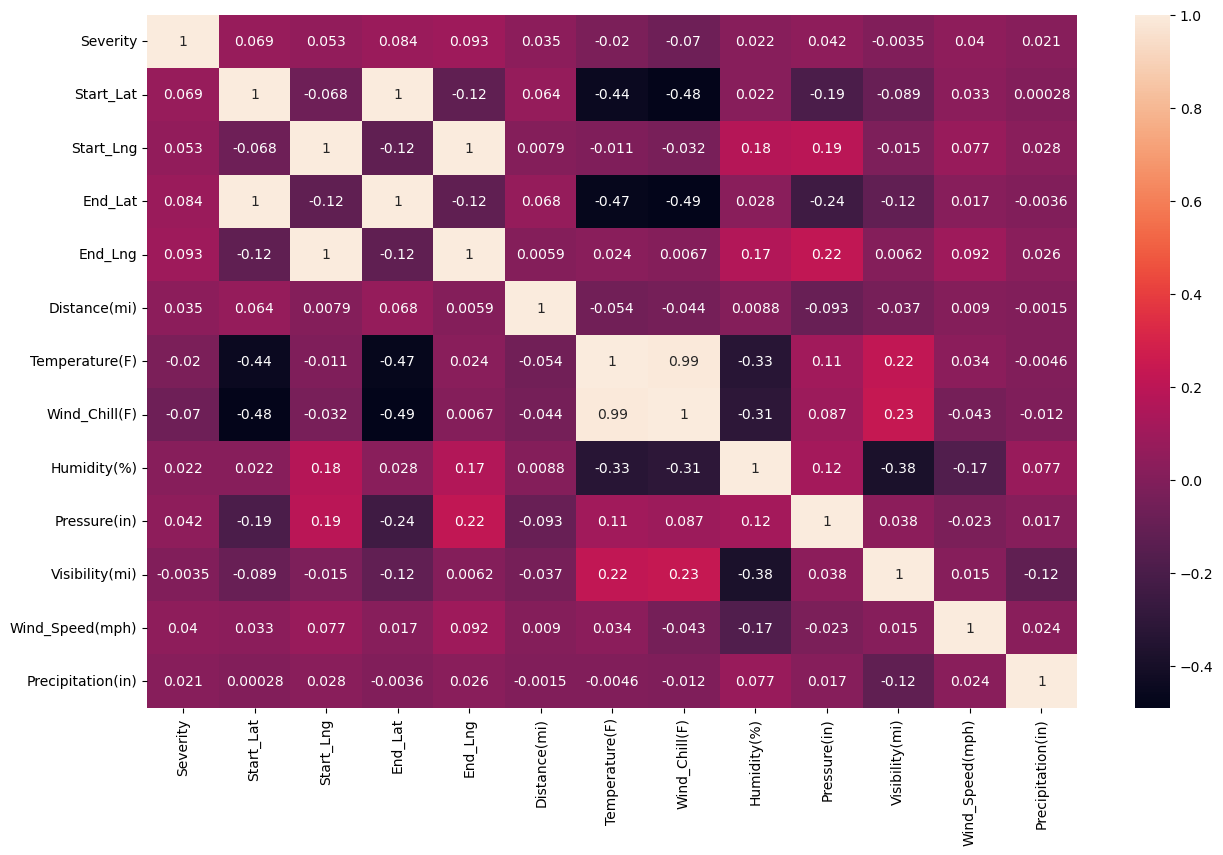

In [10]:
# Correlation heatmap based on numeric features
plt.figure(figsize=(15 ,9))
sns.heatmap(numeric_df.corr() , annot=True)
plt.show()



#### Correlation Matrix Summary
###### Strong Correlations 
Start_Lat & End_Lat = 1.00

Start_Lng & End_Lng = 1.00

Temperature(F) & Wind_Chill(F) = 0.99

These indicate high multicollinearity — these features are essentially duplicates.

#### Correlation with Severity (Target Variable)
All correlations with Severity are weak ( < 0.1):

End_Lng → 0.09

End_Lat → 0.08

Start_Lat → 0.07

Wind_Speed → 0.04

Temperature → −0.02

Insight: Severity is not strongly linearly correlated with any single feature. 


In [11]:
# Prints the name, non-null count, and data type of each column in the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [12]:
# Check the number of null values per column
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

### **Check the Percentage of Null values in each feature and Visualize**

End_Lat                 44.03
End_Lng                 44.03
Precipitation(in)       28.51
Wind_Chill(F)           25.87
Wind_Speed(mph)          7.39
Visibility(mi)           2.29
Wind_Direction           2.27
Humidity(%)              2.25
Weather_Condition        2.24
Temperature(F)           2.12
Pressure(in)             1.82
Weather_Timestamp        1.56
Sunrise_Sunset           0.30
Civil_Twilight           0.30
Nautical_Twilight        0.30
Astronomical_Twilight    0.30
Airport_Code             0.29
Street                   0.14
Timezone                 0.10
Zipcode                  0.02
City                     0.00
Description              0.00
dtype: float64


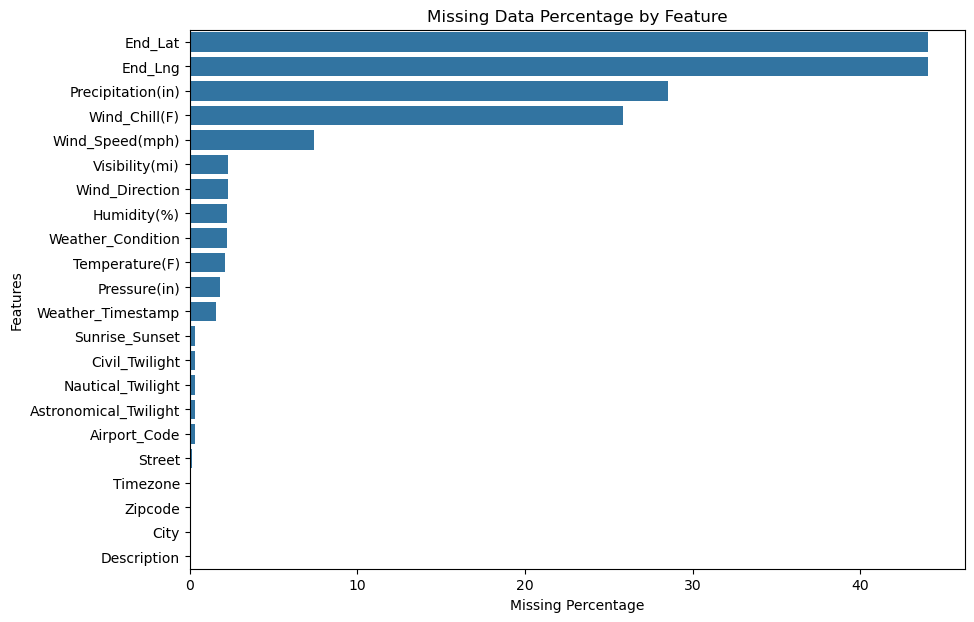

In [13]:
# First, make a list of features that have NaN values
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

# Calculate the percentage of missing values for each feature
missing_percent = df[features_with_na].isnull().sum().sort_values(ascending=False) / len(df) * 100

print(missing_percent)

# Plot the missing percentages for all features
plt.figure(figsize=(10, 7))
sns.barplot(x=missing_percent.values, y=missing_percent.index)
plt.xlabel('Missing Percentage')
plt.ylabel('Features')
plt.title('Missing Data Percentage by Feature')
plt.show()

### Analyzing the States columns

In [14]:
df['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

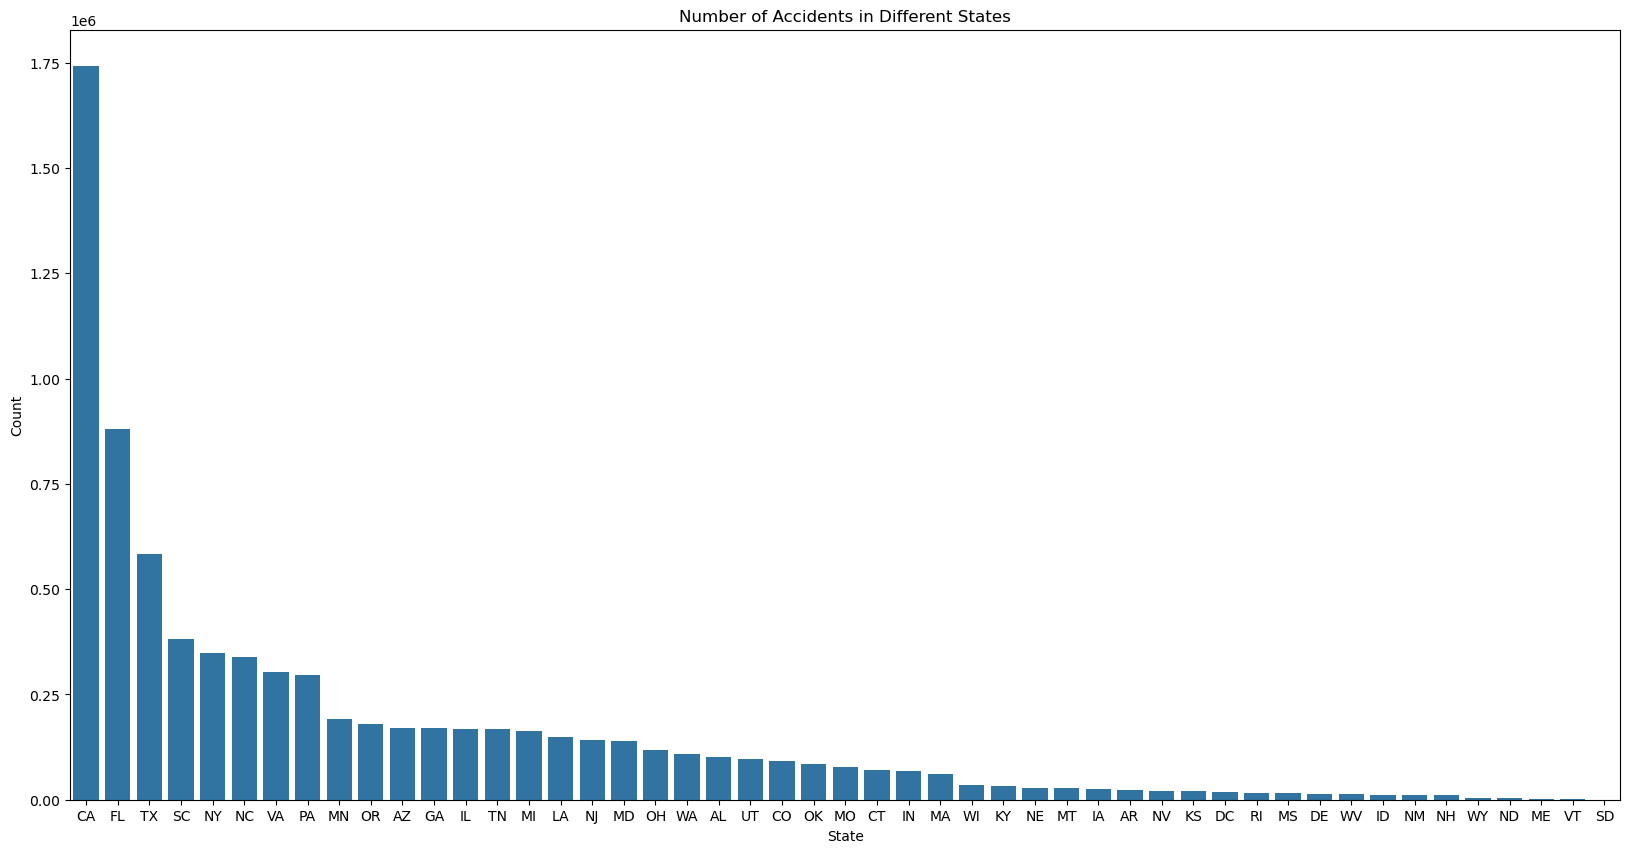

In [15]:
# Analyzing the data by 'State' feature
states = df['State'].value_counts()

# Showing accident in different states by visualization
plt.figure(figsize=(20,10))
sns.barplot(y=states , x = states.index)
plt.title('Number of Accidents in Different States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

###### CA, FL, TX, SC, NY are top five states with the highest accident number.

### Analyzing the cities columns 

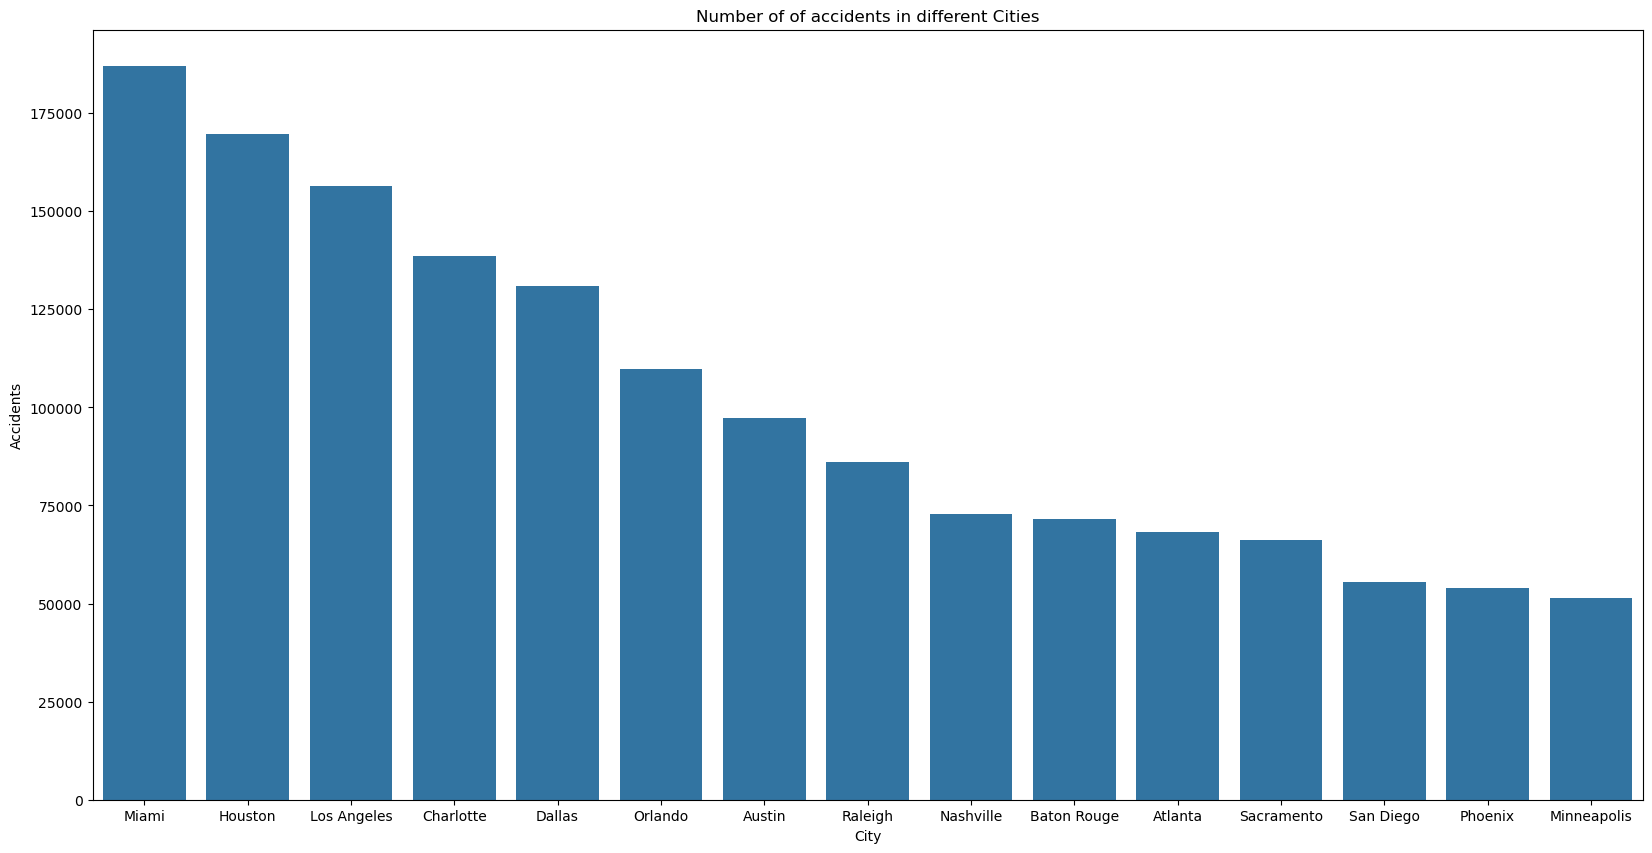

In [16]:
# Analyzing the cities columns 
df2 = df.groupby(['City'])['City'].count().sort_values(ascending=False)
#select top 15 
df_first_15 = df2.iloc[:15]    

# Showing accident in different cities by visualization
plt.figure(figsize=(20, 10))
ax = sns.barplot(x=df_first_15.index, y=df_first_15)
plt.ylabel('Accidents')
plt.title("Number of of accidents in different Cities")
plt.show()

###### Miami, Houston, Los Angeles, Charlotte, Dallas are top five cities with the highest accident number.

### Analyzing the 'Start_Time' columns  

['Start_Time', 'End_Time', 'Weather_Timestamp']
Start_Time
2016.00     410821
2017.00     717290
2018.00     893426
2019.00     954302
2020.00    1161598
2021.00    1412433
2022.00    1268806
Name: count, dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_776\828450880.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


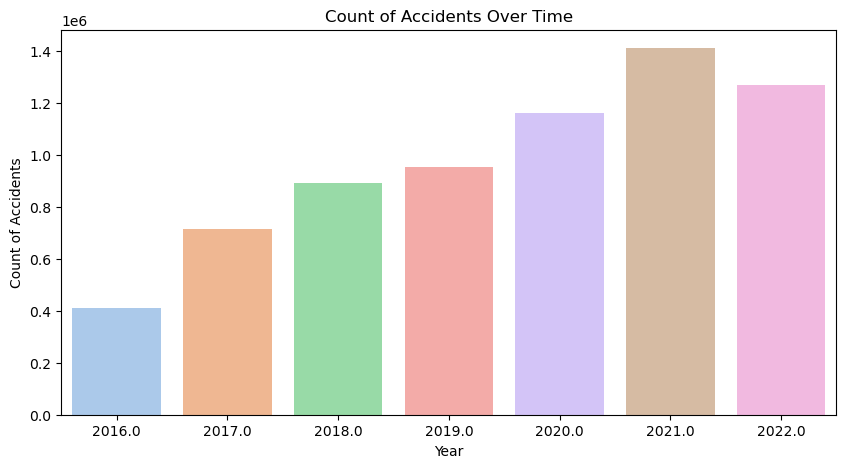

In [17]:
# First, make a list of the features that have 'Time' in the name but not 'Timezone'
features_with_time = [features for features in df.columns if 'Time' in features and 'Timezone' not in features]
print(features_with_time)

# Convert the features to datetime format
for feature in features_with_time:
    df[feature] = pd.to_datetime(df[feature], errors='coerce')  # Correct feature reference

# Drop rows where the year is 2023
""" The data for the year 2023 is incomplete (Only three months), therefore, 
it has been excluded from the analysis."""
df = df[df['Start_Time'].dt.year != 2023]

# Get the count of accidents per year
yearly_counts = df['Start_Time'].dt.year.value_counts().sort_index()
print(yearly_counts)

# Plot Accident counts over years
plt.figure(figsize=(10, 5))
sns.barplot(
    x=yearly_counts.index,
    y=yearly_counts.values,
    palette='pastel'
)
plt.title('Count of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.show()

###### Insights from the graph
######  From The number of accidents shows a general increasing trend from 2016 to 2021.
######  The lowest count is in 2016, while the highest is in 2021, indicating a consistent rise in accidents over these years. 
######  There is a slight drop in accidents in 2022 compared to 2021. Although the count is still high, this reduction might indicate the early impact of improved road safety measures, technological advancements, or shifts in travel behavior.

###### Accidents on different weekdays

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_776\3234249787.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df3.index, y=df3.values, palette='pastel')


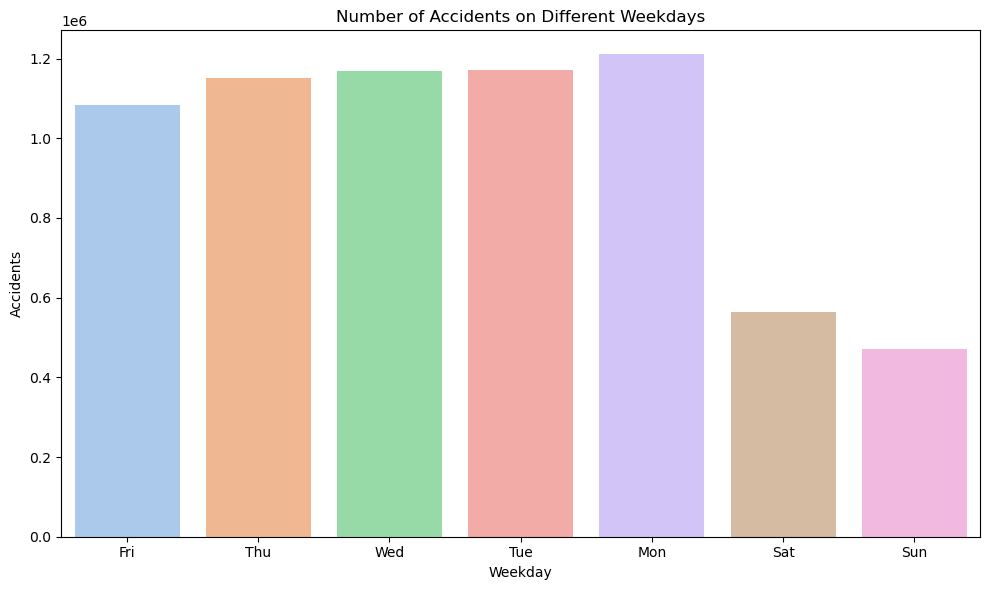

In [18]:
# How many accidents on different weekdays
df['Weekday'] = df['Start_Time'].dt.weekday  # Monday=0, Sunday=6
df3 = df.groupby(['Weekday']).size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df3.index, y=df3.values, palette='pastel')
plt.ylabel('Accidents')
plt.title("Number of Accidents on Different Weekdays")
plt.xticks(df3.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set labels for weekdays

plt.tight_layout()
plt.show()

###### Accidents on different weather condition

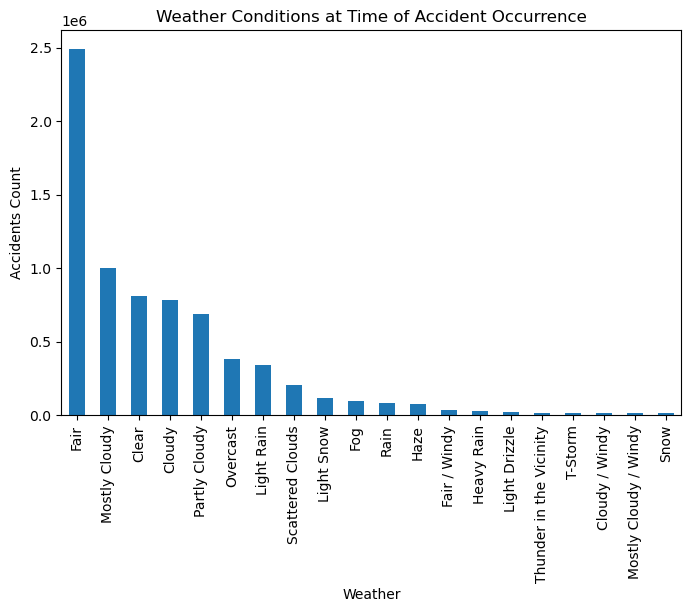

In [19]:
# Count the occurrences of each weather condition
weather_counts = df['Weather_Condition'].value_counts()

# Sort the counts in descending order and select the top 20
top_weather_conditions = weather_counts.sort_values(ascending=False).head(20)

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))
top_weather_conditions.plot(kind='bar', ax=ax)
ax.set(title='Weather Conditions at Time of Accident Occurrence',
       xlabel='Weather',
       ylabel='Accidents Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

###### Most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

###### Accident on basis of temparture in from 2017-2021

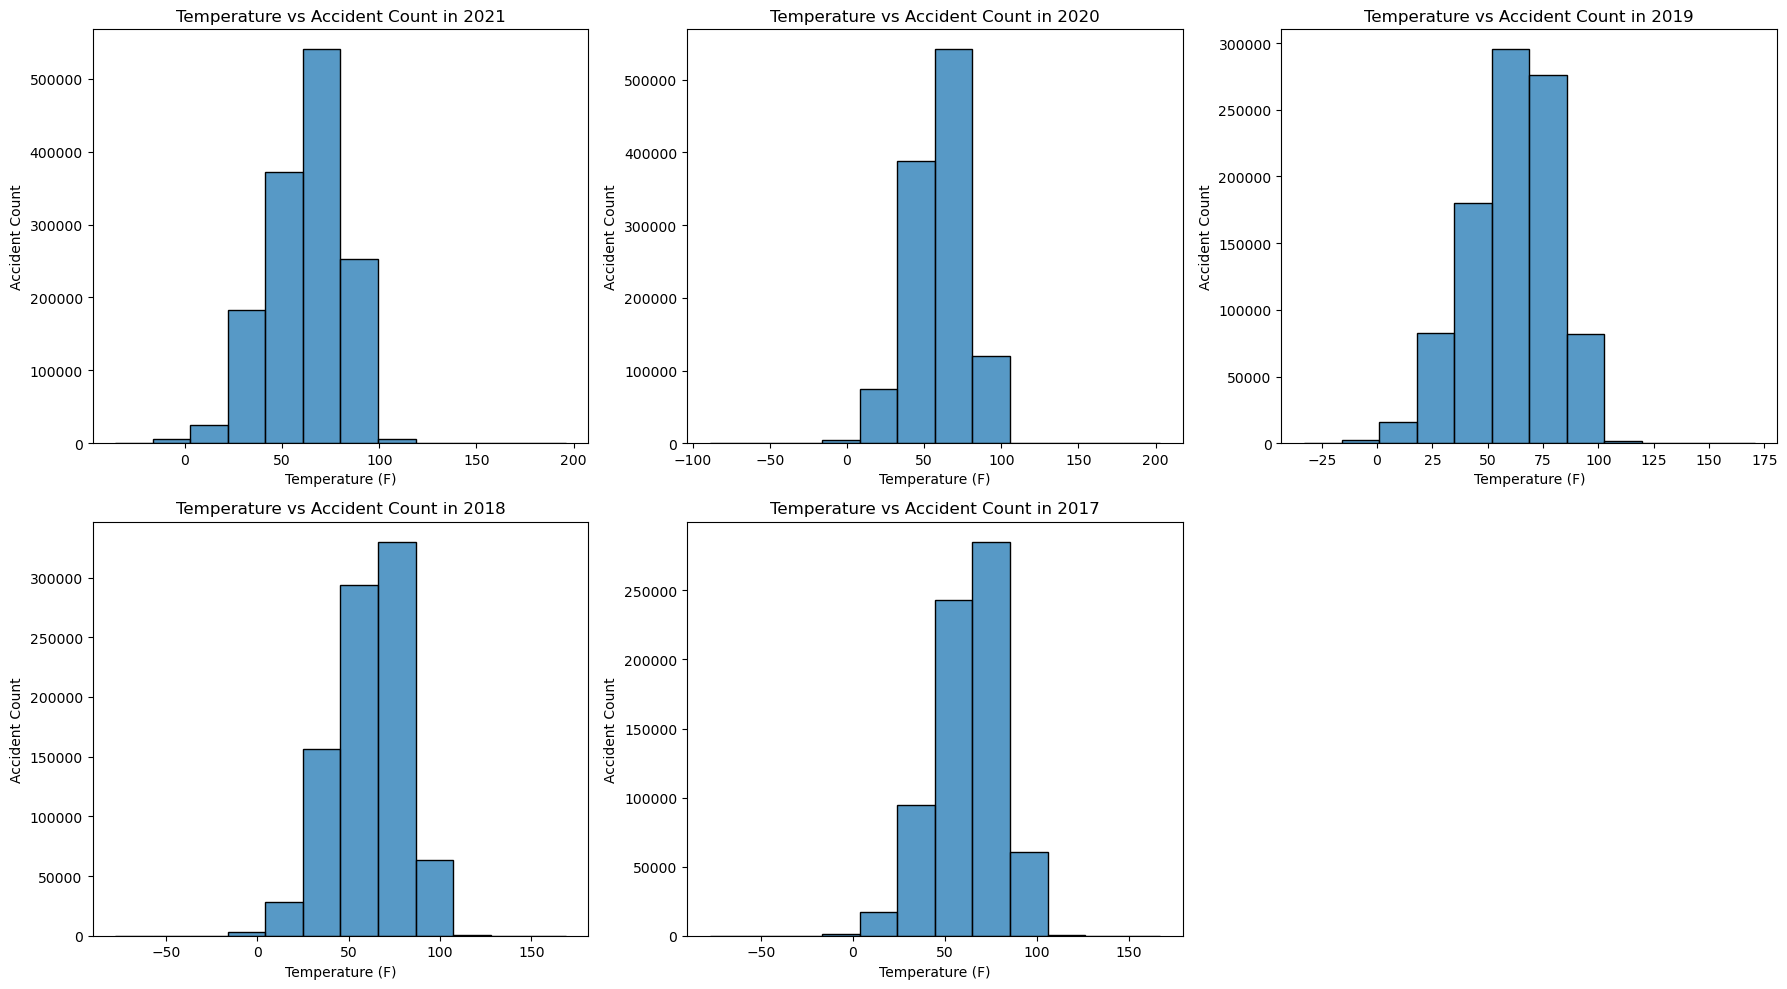

In [20]:
# checking the number of accident on basis of temparture in from 2017-2021
df_2021 = df[df.Start_Time.dt.year == 2021]
df_2020 = df[df.Start_Time.dt.year == 2020]
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2018 = df[df.Start_Time.dt.year == 2018]
df_2017 = df[df.Start_Time.dt.year == 2017]

# Set up a 2x3 grid for the subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # (2, 3) grid for 5 subplots

# List of DataFrames for each year
dfs = [df_2021, df_2020, df_2019, df_2018, df_2017]
years = [2021, 2020, 2019, 2018, 2017]

# Flatten axes to loop through them easily
axes = axes.flatten()

# Loop through each DataFrame and plot a histogram on the corresponding axis
for i, df_year in enumerate(dfs):
    # Create the histogram for temperature
    sns.histplot(df_year['Temperature(F)'], bins=12, kde=False, ax=axes[i])

    # Set the title for each subplot
    axes[i].set_title(f'Temperature vs Accident Count in {years[i]}')
    axes[i].set_xlabel('Temperature (F)')
    axes[i].set_ylabel('Accident Count')

fig.delaxes(axes[5])  # This removes the extra empty plot in the (2,3) grid

plt.tight_layout()
plt.show()

#### check if the data is unbalenced

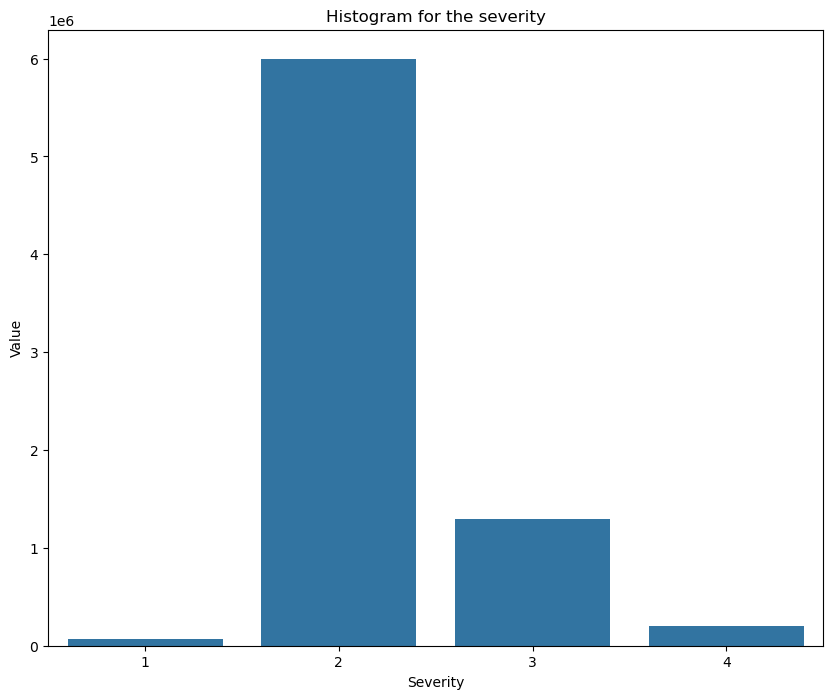

In [21]:
#check if the data is unbalenced
severity_counts = df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()


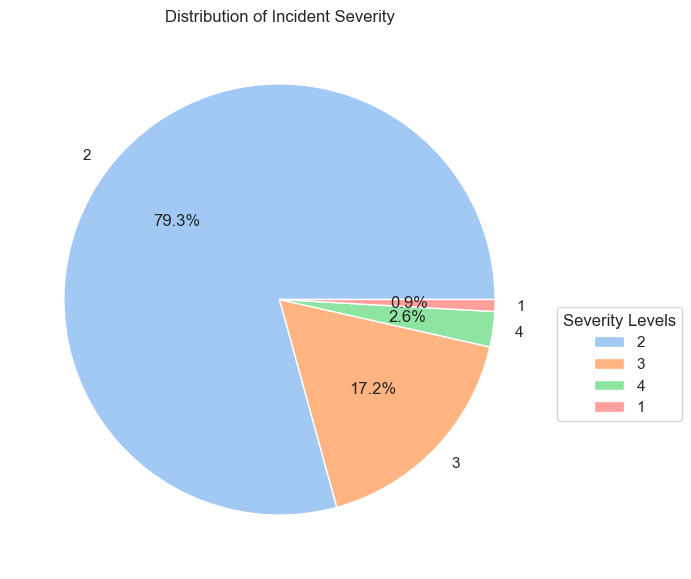

In [22]:
# Count the occurrences of each severity level
severity_count = df['Severity'].value_counts()

# Create the pie chart
sns.set(style="whitegrid")
plt.figure(figsize=(10, 7))
pastel_colors = sns.color_palette("pastel", len(severity_count))

plt.pie(
    severity_count,
    labels=severity_count.index,
    autopct='%1.1f%%',
    colors=pastel_colors
)
plt.legend(title='Severity Levels', loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Incident Severity')
plt.show()

###### Severity 2 and 4 related accident effected the traffic the most ( for severity 2 since the value count is high average distance is on the greater side but as per data severity 4 accident has greatest impact on traffic )

## Handling Missing Values

In [23]:
# I will use the mean for filling  Temperature(F) due to its symmetry
# and the median for other columns to mitigate the effects of outliers and skewed distributions.
df['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())

In [24]:
# Weather-related numerical columns  
weather_numeric = ['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)','Precipitation(in)']
for col in weather_numeric:
    df[col] = df[col].fillna(df[col].median())

In [25]:
# check for unique values of each col
cat_cols=df.select_dtypes(include=['object']).columns

for cat in cat_cols:
    print(cat, df[cat].nunique())

ID 7561842
Source 3
Description 3707651
Street 332904
City 13650
County 1869
State 49
Zipcode 814274
Country 1
Timezone 4
Airport_Code 2045
Wind_Direction 24
Weather_Condition 142
Sunrise_Sunset 2
Civil_Twilight 2
Nautical_Twilight 2
Astronomical_Twilight 2


In [26]:
# drop columns that we don't need 
df.drop(['Astronomical_Twilight', 'Nautical_Twilight','Country'], axis=1, inplace=True)

In [27]:
# Use Start_Lat and Start_Lng as an approximation (assume the accident did not deviate).  
df['End_Lat'] = df['End_Lat'].fillna(df['Start_Lat'])
df['End_Lng'] = df['End_Lng'].fillna(df['Start_Lng'])

In [28]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7561842 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Source             object        
 2   Severity           int64         
 3   Start_Time         datetime64[ns]
 4   End_Time           datetime64[ns]
 5   Start_Lat          float64       
 6   Start_Lng          float64       
 7   End_Lat            float64       
 8   End_Lng            float64       
 9   Distance(mi)       float64       
 10  Description        object        
 11  Street             object        
 12  City               object        
 13  County             object        
 14  State              object        
 15  Zipcode            object        
 16  Timezone           object        
 17  Airport_Code       object        
 18  Weather_Timestamp  datetime64[ns]
 19  Temperature(F)     float64       
 20  Wind_Chill(F)      float64   

In [29]:
# Weather-related categorical columns  
df['Weather_Condition'] =df['Weather_Condition'].fillna('Unknown')
df['Wind_Direction'] = df['Wind_Direction'].fillna('Unknown')

In [30]:
# Time-related columns 
df['Weather_Timestamp'] =  df['Weather_Timestamp'].fillna( df['Start_Time'])

In [31]:
print(" Missing values:\n",  df.isnull().sum().sort_values(ascending=False))


 Missing values:
 Weekday              743166
Start_Time           743166
End_Time             743166
Sunrise_Sunset        22112
Civil_Twilight        22112
Airport_Code          22071
Weather_Timestamp     14019
Street                10346
Timezone               7683
Zipcode                1886
City                    251
Description               5
Bump                      0
Crossing                  0
Give_Way                  0
No_Exit                   0
Railway                   0
Junction                  0
Station                   0
Roundabout                0
Weather_Condition         0
Stop                      0
Traffic_Calming           0
Traffic_Signal            0
Turning_Loop              0
Amenity                   0
ID                        0
Precipitation(in)         0
County                    0
Severity                  0
Start_Lat                 0
Start_Lng                 0
End_Lat                   0
End_Lng                   0
Distance(mi)              0
St

In [32]:
# Categorical columns with few missing values  
df['Street'] =  df['Street'].fillna('Unknown')
df['Zipcode'] = df['Zipcode'].fillna('Unknown')

In [33]:
# 1. Drop rows with missing 'Description'  
df.dropna(subset=['Description'], inplace=True)

In [34]:
# 2. Fill missing 'City' values   
df['City'] = df['City'].fillna('Unknown')

In [35]:
df.drop(['ID','Source'], axis=1, inplace=True)

In [36]:
#df.drop(['ID', 'Description', 'County', 'Zipcode', 'Timezone', 'Airport_Code','Wind_Direction', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1, inplace=True)
df.drop([ 'Description', 'County', 'Zipcode', 'Timezone', 'Airport_Code','Wind_Direction', 'Civil_Twilight'], axis=1, inplace=True)

In [37]:
df["Severity"].value_counts() 

Severity
2    5995268
3    1299335
4     199868
1      67366
Name: count, dtype: int64

In [38]:
min_class_count = df["Severity"].value_counts().min()

# undersampling the classes to match the minimum count and to prevent memory error 
df_final = df.groupby('Severity').apply(lambda x: x.sample(n=min_class_count, random_state=42))
df_final = df_final.reset_index(drop=True)
# shuffling
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

df_final['Severity'].value_counts() 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_776\657115938.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df.groupby('Severity').apply(lambda x: x.sample(n=min_class_count, random_state=42))


Severity
4    67366
1    67366
3    67366
2    67366
Name: count, dtype: int64

In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269464 entries, 0 to 269463
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           269464 non-null  int64         
 1   Start_Time         254549 non-null  datetime64[ns]
 2   End_Time           254549 non-null  datetime64[ns]
 3   Start_Lat          269464 non-null  float64       
 4   Start_Lng          269464 non-null  float64       
 5   End_Lat            269464 non-null  float64       
 6   End_Lng            269464 non-null  float64       
 7   Distance(mi)       269464 non-null  float64       
 8   Street             269464 non-null  object        
 9   City               269464 non-null  object        
 10  State              269464 non-null  object        
 11  Weather_Timestamp  269070 non-null  datetime64[ns]
 12  Temperature(F)     269464 non-null  float64       
 13  Wind_Chill(F)      269464 non-null  float64 

## Handling unbalenced Data

In [40]:
min_class_count = df["Severity"].value_counts().min()

# undersampling the classes to match the minimum count and to prevent memory error 
df_final = df.groupby('Severity').apply(lambda x: x.sample(n=min_class_count, random_state=42))
df_final = df_final.reset_index(drop=True)
# shuffling
df_final = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

df_final['Severity'].value_counts() 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_776\657115938.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_final = df.groupby('Severity').apply(lambda x: x.sample(n=min_class_count, random_state=42))


Severity
4    67366
1    67366
3    67366
2    67366
Name: count, dtype: int64

## Data Processing

### **Data Cleaning**

In [41]:
df_final.duplicated().sum() 

2426

In [42]:
df_final = df_final.drop_duplicates()


In [43]:
# Ensure Start_Time is datetime
df_final['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour, dayofweek, and month
df_final['hour'] = df_final['Start_Time'].dt.hour
df_final['dayofweek'] = df_final['Start_Time'].dt.dayofweek
df_final['month'] =df_final['Start_Time'].dt.month

# Then drop the original datetime column
df_final = df_final.drop(columns=['Start_Time', 'End_Time', 'Weather_Timestamp'])


### **Checking Oultiers**

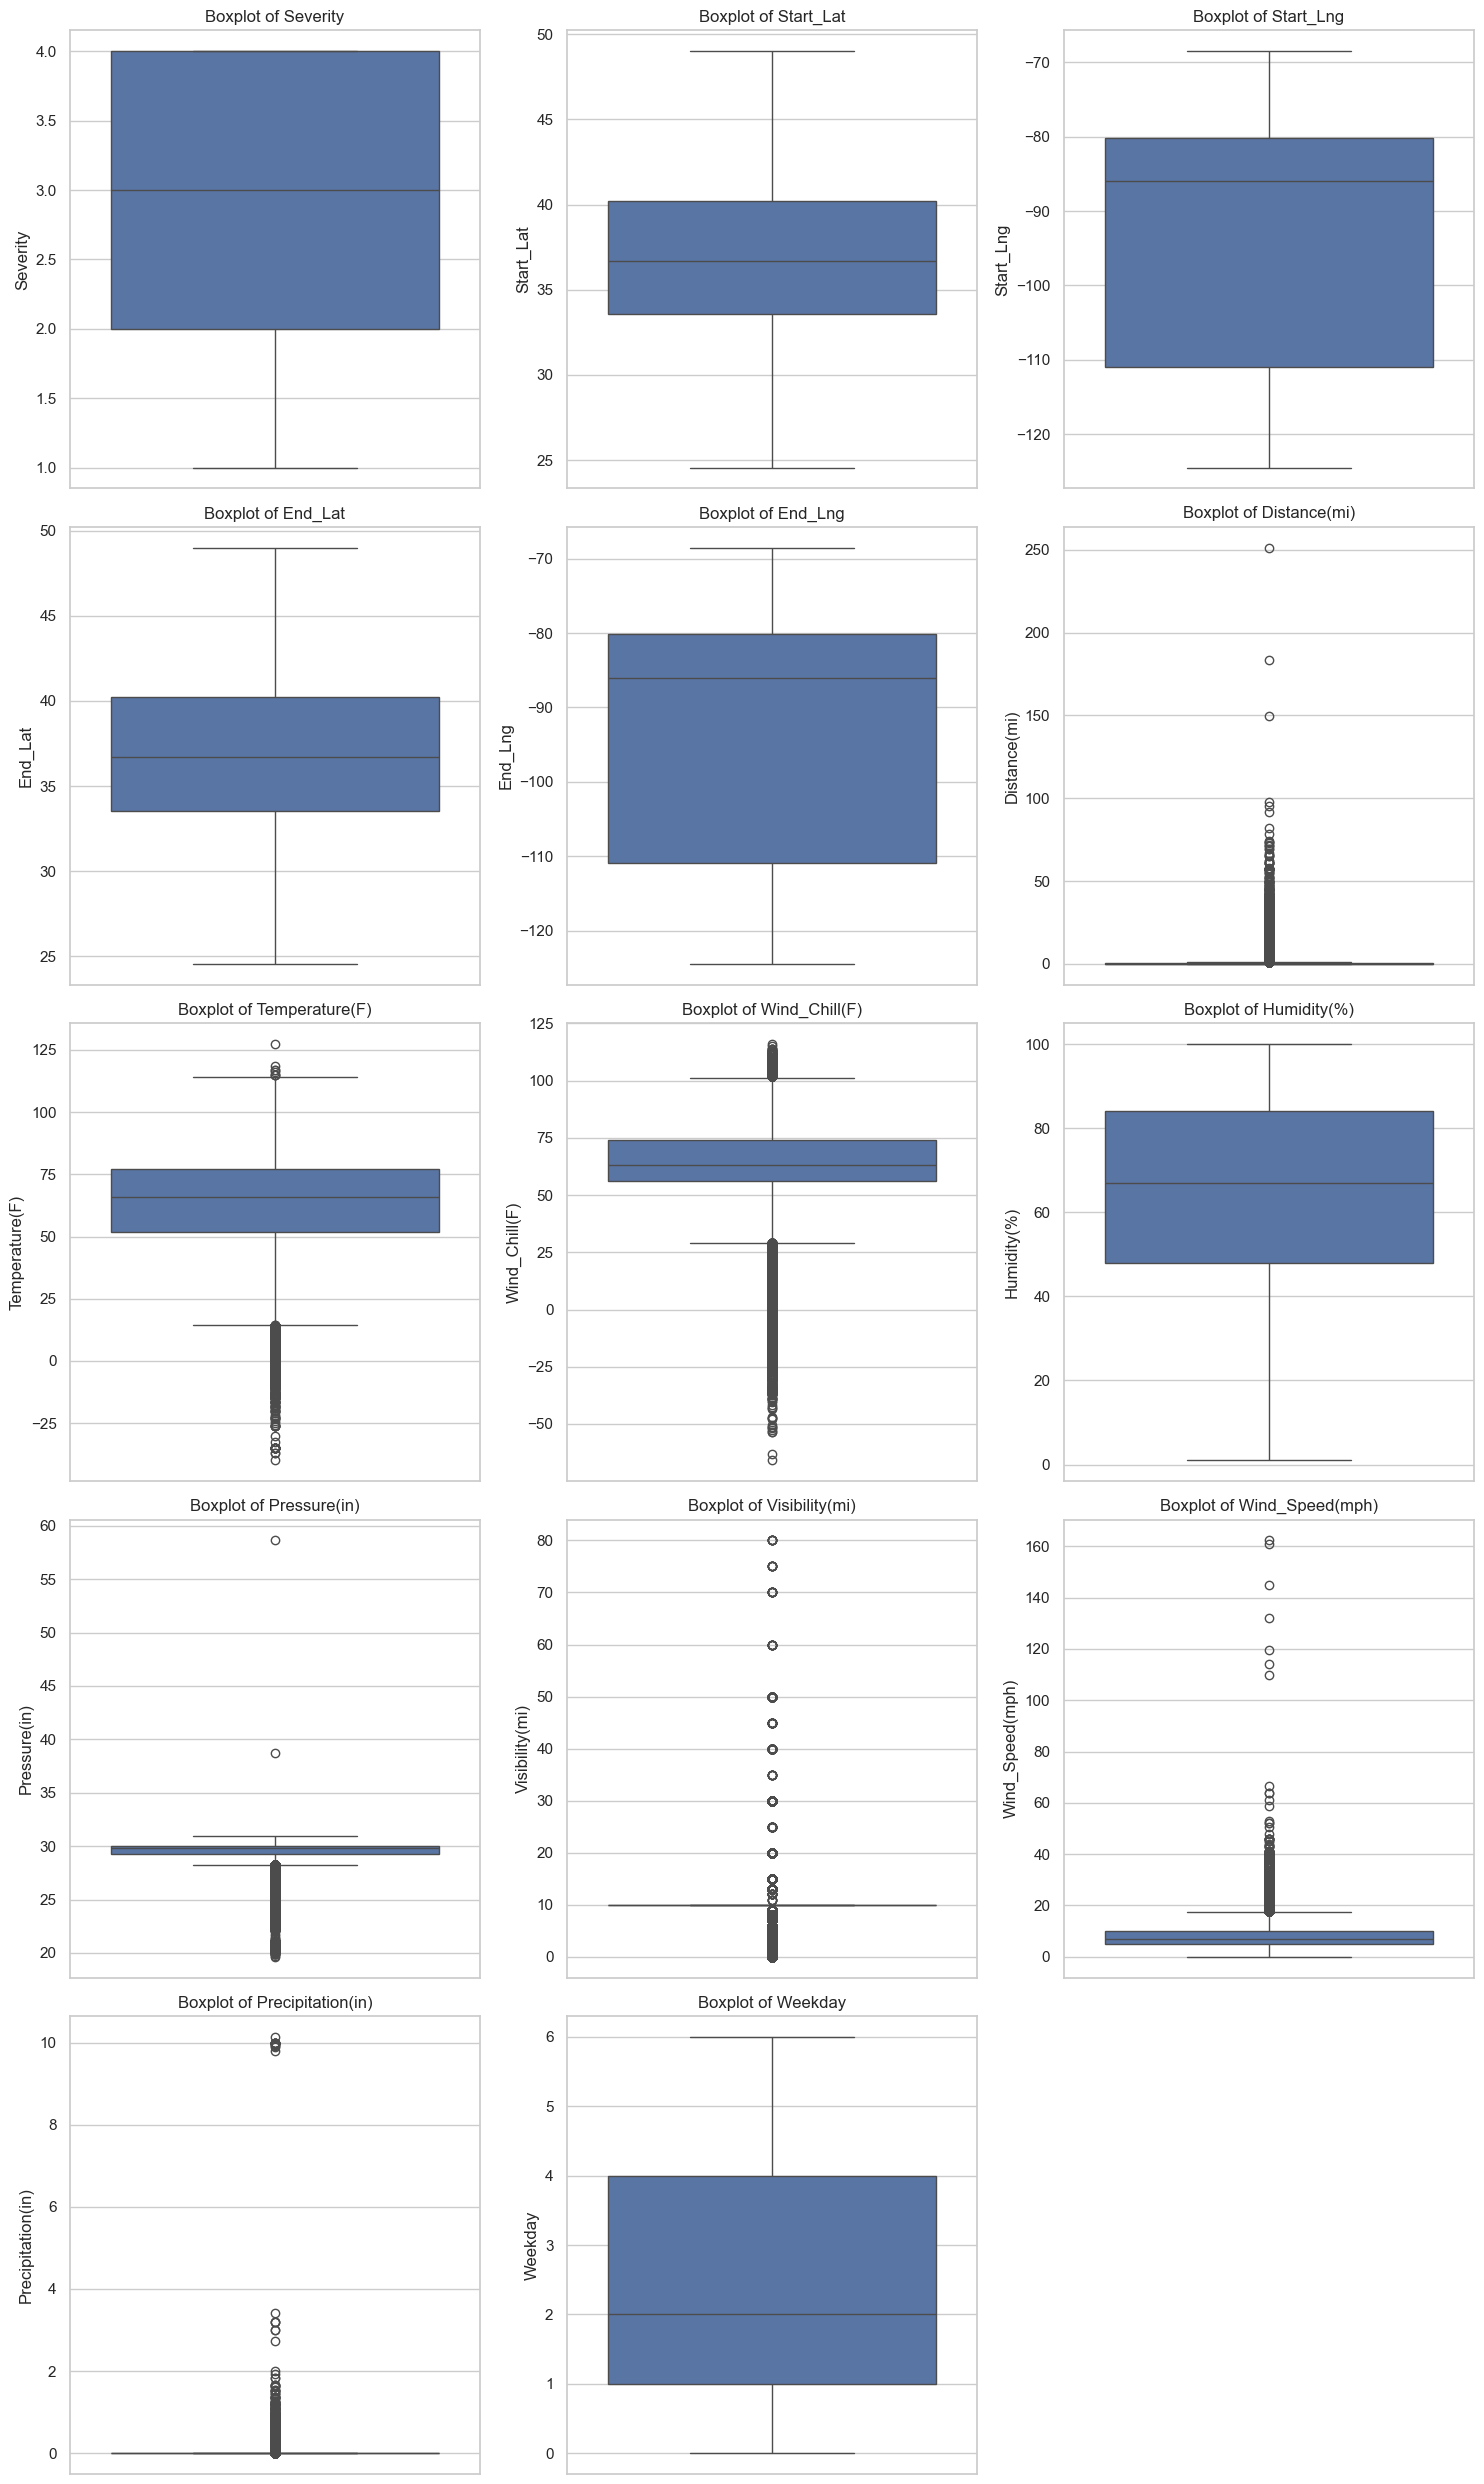

In [44]:
# Create box plots to detect outliers in the original DataFrame
num_features = len(df_final.select_dtypes(include=['float64', 'int64']).columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()

# Plot boxplots for each numerical feature in df
for i, feature in enumerate(df_final.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=df_final[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [45]:
df_final.select_dtypes(include=['float64', 'int64']).columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weekday'],
      dtype='object')

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267038 entries, 0 to 269463
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           267038 non-null  int64  
 1   Start_Lat          267038 non-null  float64
 2   Start_Lng          267038 non-null  float64
 3   End_Lat            267038 non-null  float64
 4   End_Lng            267038 non-null  float64
 5   Distance(mi)       267038 non-null  float64
 6   Street             267038 non-null  object 
 7   City               267038 non-null  object 
 8   State              267038 non-null  object 
 9   Temperature(F)     267038 non-null  float64
 10  Wind_Chill(F)      267038 non-null  float64
 11  Humidity(%)        267038 non-null  float64
 12  Pressure(in)       267038 non-null  float64
 13  Visibility(mi)     267038 non-null  float64
 14  Wind_Speed(mph)    267038 non-null  float64
 15  Precipitation(in)  267038 non-null  float64
 16  Weather

### **Removing Outliers**

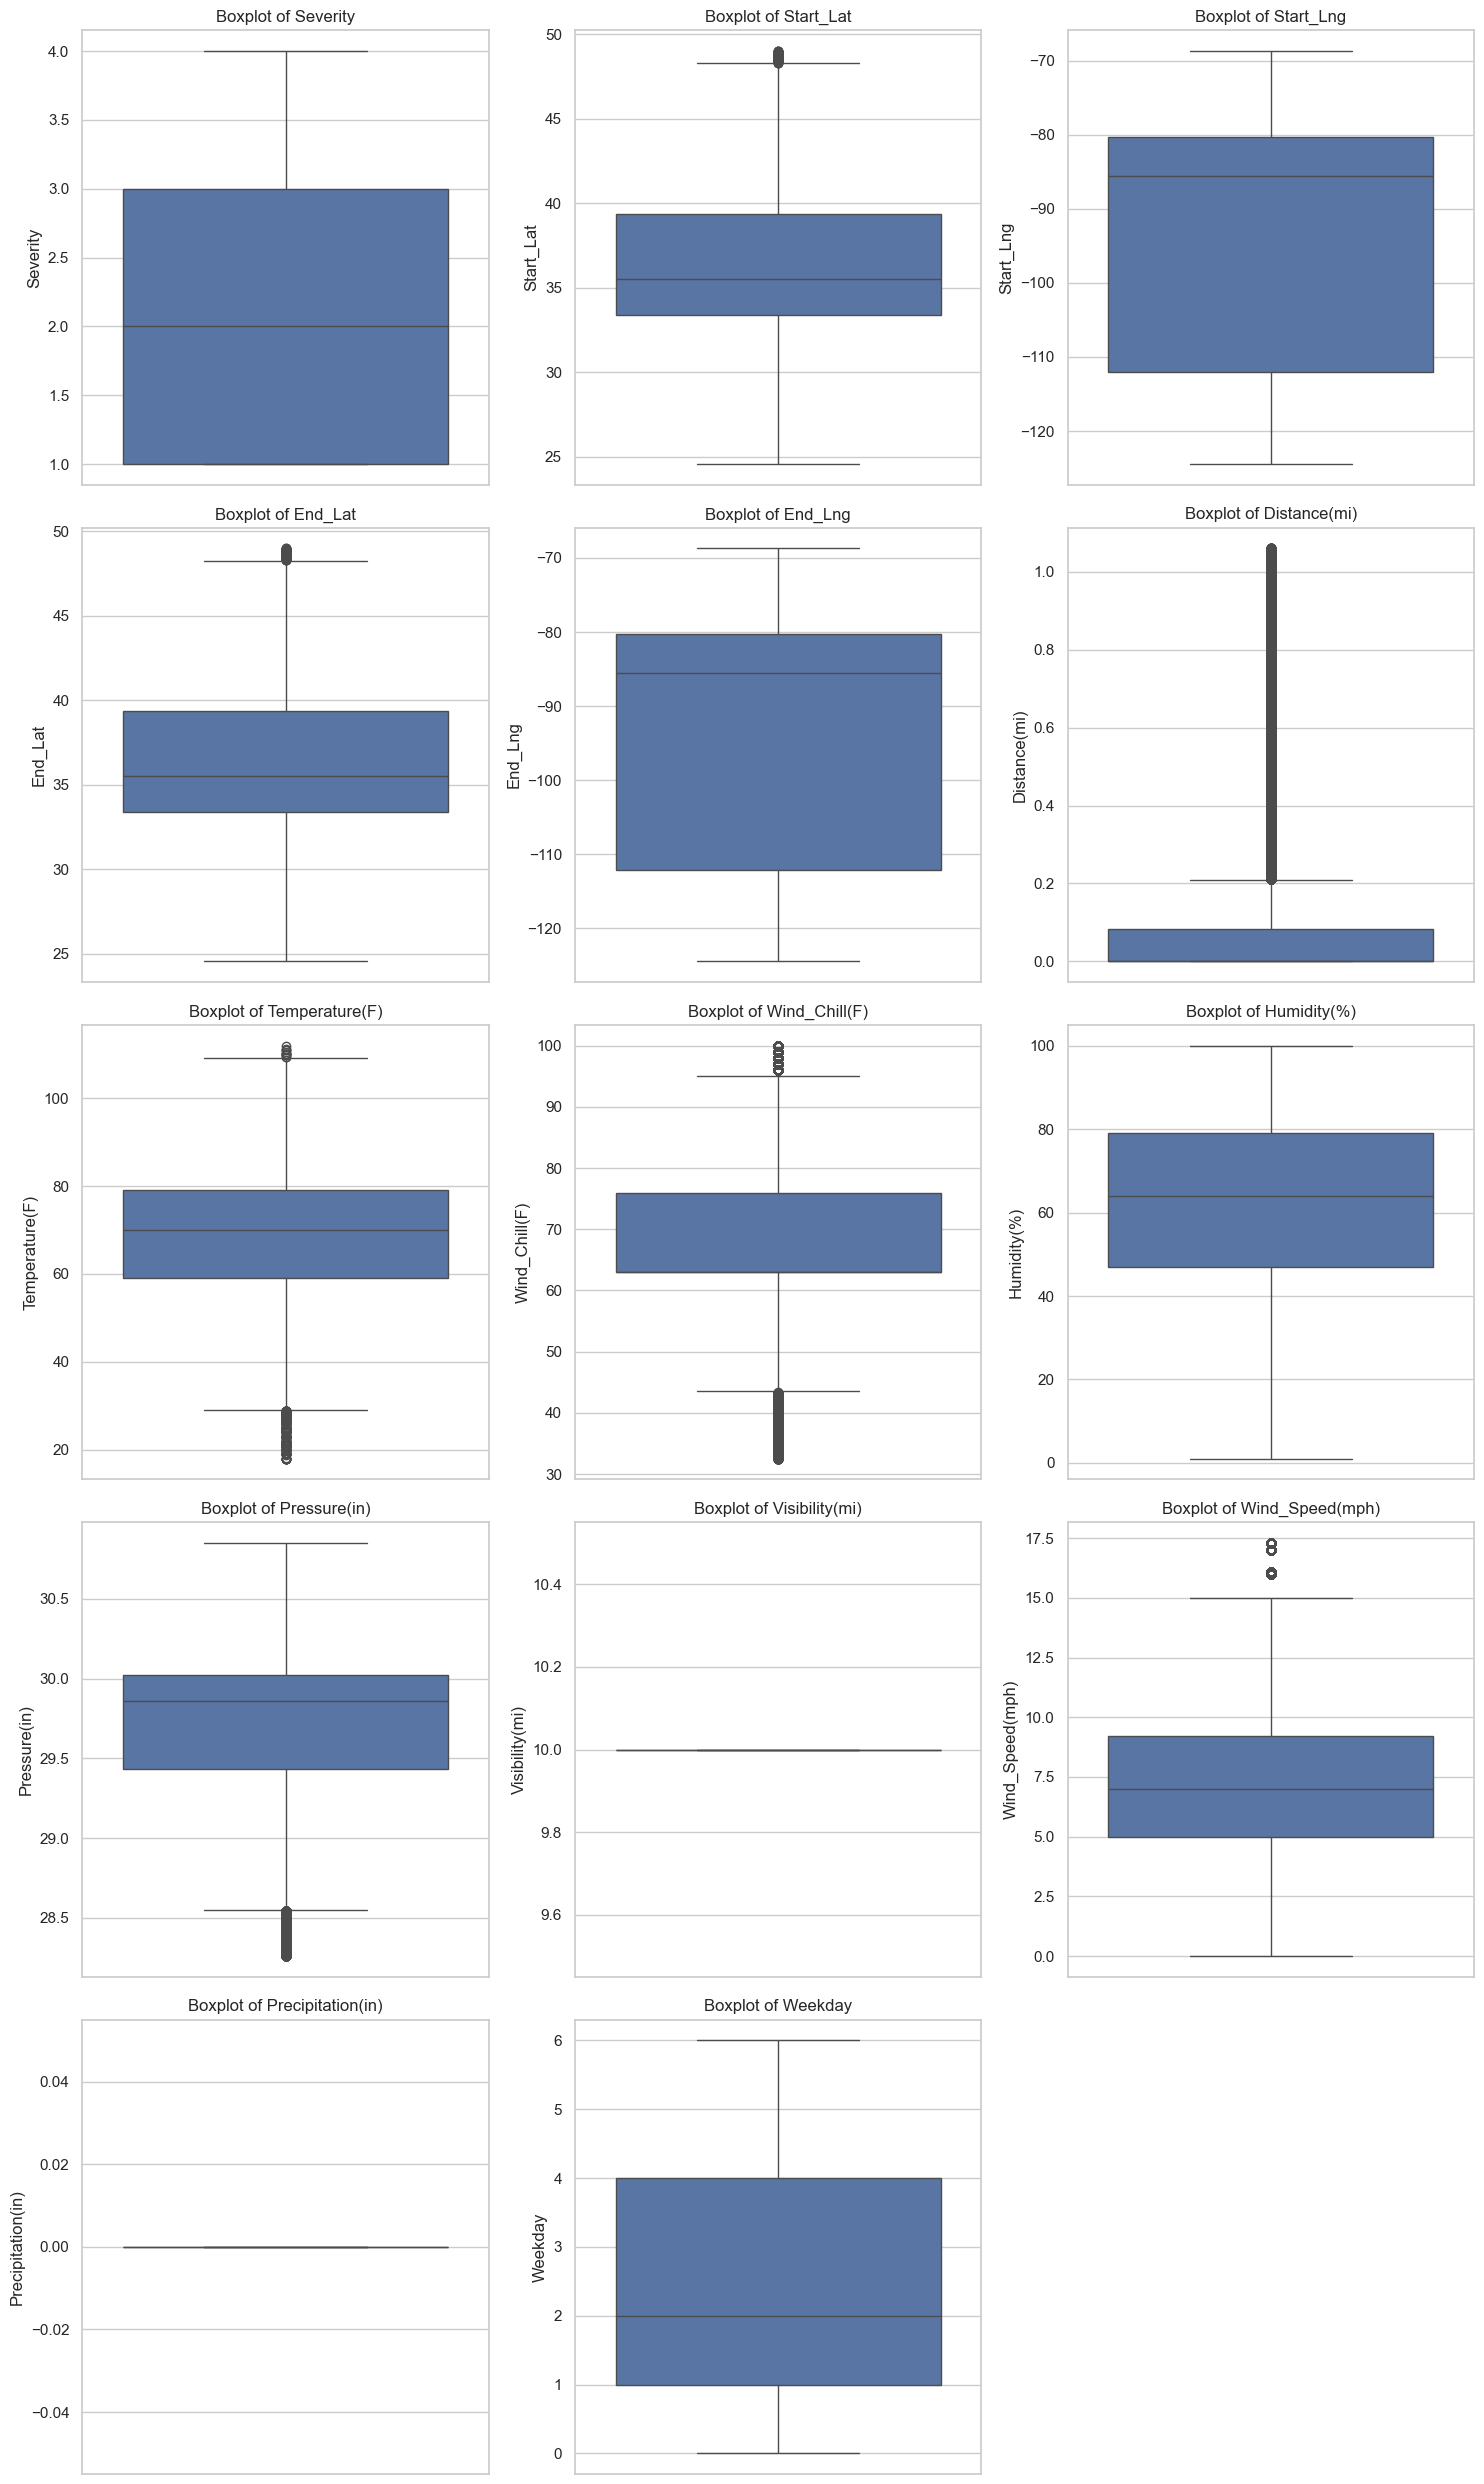

In [47]:
#Initialize a DataFrame to hold the cleaned data
cleaned_df = df_final.copy()

# Remove outliers using IQR method
for feature in cleaned_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = cleaned_df[feature].quantile(0.25)
    Q3 = cleaned_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]

# Create box plots for the cleaned data
num_features = len(cleaned_df.select_dtypes(include=['float64', 'int64']).columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()

# Plot boxplots for each numerical feature in cleaned_df
for i, feature in enumerate(cleaned_df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=cleaned_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Engineering


In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 1. Separate features and target
X = cleaned_df.drop('Severity', axis=1)
y = cleaned_df['Severity']

# 2. Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# 3. Label Encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# 4. Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# 5. Final processed DataFrame (features and target separate)
X_processed = X
y_processed = y

# Optional: Combine back into one DataFrame if needed
df_processed = pd.concat([X_processed, y_processed], axis=1)

# View the processed DataFrame
print(df_processed.head())


   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  Street  City  State  \
0      -0.16       0.48    -0.16     0.48          1.97   25713  3785     39   
2       1.06       0.43     1.06     0.43          3.85   10328  1180     13   
3       0.31       0.92     0.31     0.92         -0.48   32980  5204     42   
5      -0.42       0.51    -0.42     0.51          0.61   25713   228      9   
6      -1.53       0.62    -1.53     0.62         -0.48   28106  5883      8   

   Temperature(F)  Wind_Chill(F)  ...   Stop  Traffic_Calming  Traffic_Signal  \
0            0.58          -0.32  ...  False            False           False   
2           -0.41          -0.32  ...  False            False           False   
3            0.37           0.54  ...  False            False           False   
5            1.21          -0.32  ...  False            False           False   
6            0.93           1.16  ...  False            False           False   

   Turning_Loop  Sunrise_Sunset 

In [49]:
df_processed

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,City,State,Temperature(F),Wind_Chill(F),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weekday,hour,dayofweek,month,Severity
0,-0.16,0.48,-0.16,0.48,1.97,25713,3785,39,0.58,-0.32,...,False,False,False,False,0,0.85,5,0,2,4
2,1.06,0.43,1.06,0.43,3.85,10328,1180,13,-0.41,-0.32,...,False,False,False,False,0,1.41,6,0,2,4
3,0.31,0.92,0.31,0.92,-0.48,32980,5204,42,0.37,0.54,...,False,False,False,False,0,-0.85,7,0,2,1
5,-0.42,0.51,-0.42,0.51,0.61,25713,228,9,1.21,-0.32,...,False,False,False,False,0,-0.29,7,0,2,4
6,-1.53,0.62,-1.53,0.62,-0.48,28106,5883,8,0.93,1.16,...,False,False,False,False,0,0.85,7,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269456,0.42,-1.71,0.42,-1.71,-0.48,18010,3729,3,-0.06,0.07,...,False,False,False,False,0,0.85,21,1,1,1
269457,-0.47,-1.11,-0.47,-1.11,2.77,27604,5585,2,-0.34,-0.32,...,False,False,False,False,0,-1.42,21,1,1,4
269458,1.35,0.57,1.35,0.57,2.40,25824,2029,20,-1.26,-0.32,...,False,False,False,False,1,-0.29,21,1,1,2
269459,0.82,0.41,0.82,0.41,-0.48,15822,2921,13,-1.32,-1.33,...,False,False,True,False,1,-1.42,21,1,1,2


### Model Training & Evaluation


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [51]:



#  Split the data (70% train,30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Important pour garder la distribution des classes
)


print(f"Train: {X_train.shape[0]} sample")

print(f"Test: {X_test.shape[0]} sample")

# Optimisation du modèle (avec les meilleurs paramètres trouvés)
# Model Optimization (with best found parameters)
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

#  Training on Train Set
best_rf.fit(X_train, y_train)


#  Évaluation finale sur le test set (uniquement quand le modèle est finalisé)
#  Final Evaluation on Test Set (Only When Model is Finalized)
y_test_pred = best_rf.predict(X_test)
print("\nTest Set Performance:")
print(classification_report(y_test, y_test_pred))

Train: 104178 sample
Test: 44648 sample

Test Set Performance:
              precision    recall  f1-score   support

           1       0.79      0.89      0.84     13808
           2       0.70      0.49      0.58     10416
           3       0.75      0.76      0.75     12397
           4       0.70      0.81      0.75      8027

    accuracy                           0.75     44648
   macro avg       0.73      0.74      0.73     44648
weighted avg       0.74      0.75      0.74     44648



## Result


The analysis revealed strong correlations between accident severity and geographical features such as end latitude and longitude, along with weather factors like temperature and wind chill. While temperature and wind chill were highly interrelated (0.99), both showed moderate negative correlation with severity. Other features like distance, visibility, and wind speed had only weak correlations.



## Conclusion


Accident severity is notably influenced by location and weather conditions, especially temperature and wind chill. These insights highlight the importance of incorporating environmental and geographic data in traffic safety strategies and future predictive modeling efforts.
